In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [10]:


# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Keep only the first 1000 data points for both training and testing
num_samples = 1000
train_images = train_images[:num_samples] / 255.0
test_images = test_images[:num_samples] / 255.0

num_classes = 10
train_labels = keras.utils.to_categorical(train_labels[:num_samples], num_classes)
test_labels = keras.utils.to_categorical(test_labels[:num_samples], num_classes)


In [11]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [12]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10
16/16 [==============================] - 3s 69ms/step - loss: 2.2823 - accuracy: 0.1440 - val_loss: 2.2351 - val_accuracy: 0.1610
Epoch 2/10
16/16 [==============================] - 1s 44ms/step - loss: 2.1707 - accuracy: 0.2230 - val_loss: 2.1252 - val_accuracy: 0.2270
Epoch 3/10
16/16 [==============================] - 1s 50ms/step - loss: 2.0236 - accuracy: 0.2640 - val_loss: 2.0288 - val_accuracy: 0.2930
Epoch 4/10
16/16 [==============================] - 1s 50ms/step - loss: 1.9642 - accuracy: 0.2770 - val_loss: 1.9576 - val_accuracy: 0.2970
Epoch 5/10
16/16 [==============================] - 1s 46ms/step - loss: 1.8624 - accuracy: 0.3170 - val_loss: 1.9158 - val_accuracy: 0.3000
Epoch 6/10
16/16 [==============================] - 1s 43ms/step - loss: 1.7635 - accuracy: 0.3470 - val_loss: 1.8792 - val_accuracy: 0.3290
Epoch 7/10
16/16 [==============================] - 1s 41ms/step - loss: 1.6929 - accuracy: 0.4020 - val_loss: 1.8464 - val_accuracy: 0.3550
Epoch 8/10
16

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

32/32 - 0s - loss: 1.8138 - accuracy: 0.3700 - 307ms/epoch - 10ms/step
Test accuracy: 0.3700000047683716


313/313 [==============================] - 3s 9ms/step


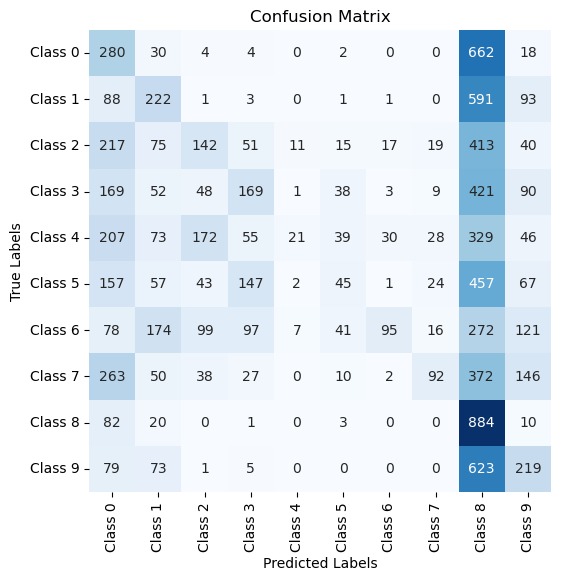

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.17      0.28      0.21      1000
     Class 1       0.27      0.22      0.24      1000
     Class 2       0.26      0.14      0.18      1000
     Class 3       0.30      0.17      0.22      1000
     Class 4       0.50      0.02      0.04      1000
     Class 5       0.23      0.04      0.08      1000
     Class 6       0.64      0.10      0.17      1000
     Class 7       0.49      0.09      0.15      1000
     Class 8       0.18      0.88      0.29      1000
     Class 9       0.26      0.22      0.24      1000

    accuracy                           0.22     10000
   macro avg       0.33      0.22      0.18     10000
weighted avg       0.33      0.22      0.18     10000



In [19]:
# Make predictions on the test data
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded true labels back to single labels
true_labels = test_labels.squeeze()

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Calculate the classification report
class_report = classification_report(true_labels, predicted_labels, target_names=["Class 0", "Class 1", "Class 2", "Class 3", "Class 4", "Class 5", "Class 6", "Class 7", "Class 8", "Class 9"])

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, square=True, xticklabels=["Class 0", "Class 1", "Class 2", "Class 3", "Class 4", "Class 5", "Class 6", "Class 7", "Class 8", "Class 9"], yticklabels=["Class 0", "Class 1", "Class 2", "Class 3", "Class 4", "Class 5", "Class 6", "Class 7", "Class 8", "Class 9"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Display the classification report
print("Classification Report:")
print(class_report)
